<img src= 'En.png' width=300/>

# EnPowered Project


## Objective 
We’d like you to build a classifier that identifies a successful or unsuccessful Kickstarter project.

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity and merchandising. The company’s stated mission is to “help bring creative projects to life.” Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.

## Target
The target is 'state' which shows whether the project was successful, failed, suspended, live, or cancelled. The live, cancelled and suspended states were eliminated

## Model Deployment
Model deployed and exposed as RESTful Web API endpoint using Flask

## 1. Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import io
import os
import requests
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [3]:
enp = pd.read_csv("kickstarter-dataset-2.csv", encoding='latin1')

In [4]:
enp.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Standardize the column names

In [5]:
enp.columns = [col.strip().replace(' ', '_').lower() for col in enp.columns]
enp.columns = [col.strip().replace('-', '_').lower() for col in enp.columns]

## 3. Data Summary

In [6]:
enp.shape

(378661, 15)

In [7]:
enp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
enp.describe().T

,count,mean,std,min,25%,50%,75%,max
id,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd_pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


In [9]:
enp.describe(include='object').T

,count,unique,top,freq
name,378657,375764,New EP/Music Development,41
category,378661,159,Product Design,22314
main_category,378661,15,Film & Video,63585
currency,378661,14,USD,295365
deadline,378661,3164,2014-08-08,705
launched,378661,378089,1970-01-01 01:00:00,7
state,378661,6,failed,197719
country,378661,23,US,292627


## 4. Exploratory Data Analyses

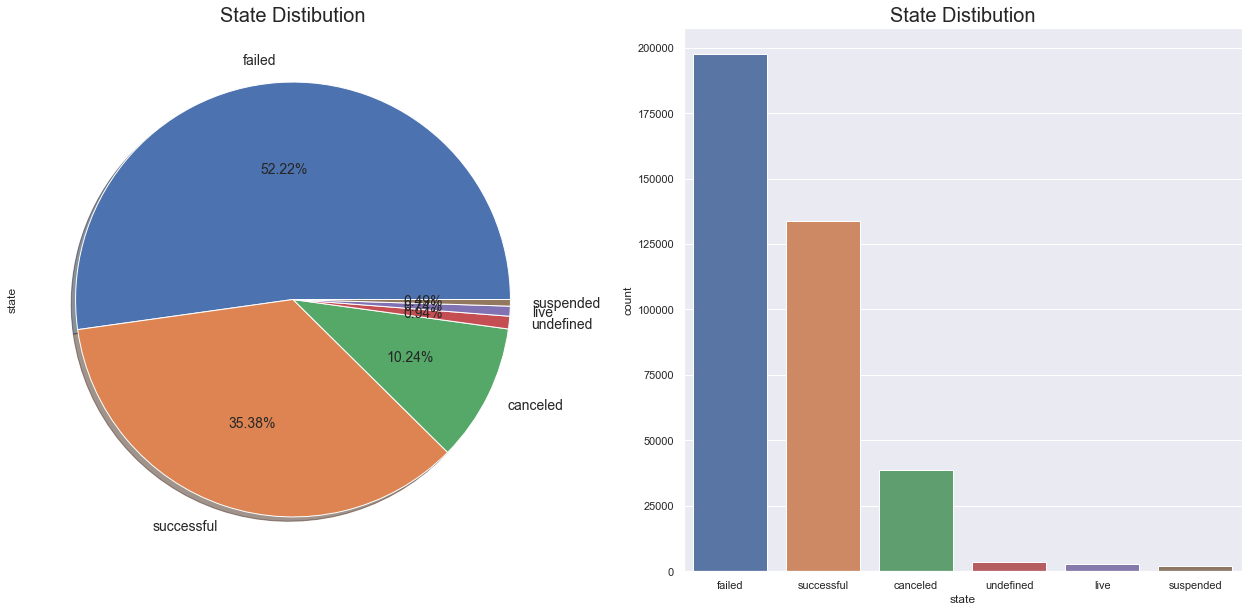

In [10]:
f,ax=plt.subplots(1,2,figsize=(22,10))
enp['state'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], shadow=True, fontsize=14)
ax[0].set_title('State Distibution', fontsize=20)

sns.countplot(x="state", data=enp, order = enp['state'].value_counts().index)
ax[1].set_title('State Distibution', fontsize=20)
plt.show()

In [11]:
enp['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

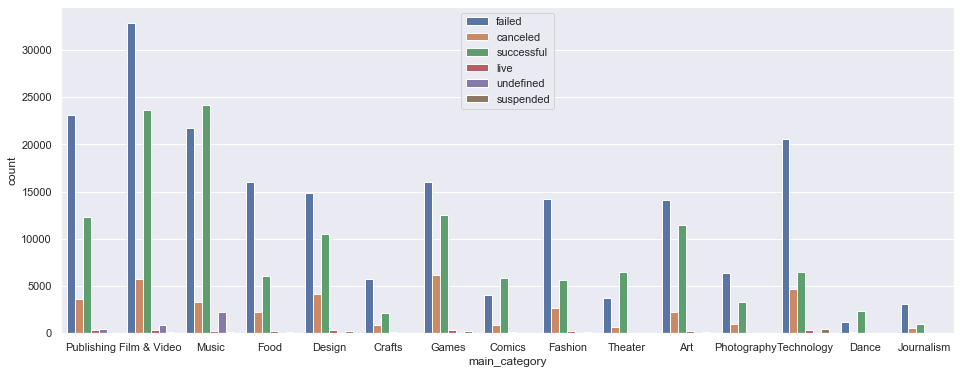

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=enp, hue= 'state')
plt.legend(loc='upper center')
plt.tight_layout

In [13]:
enp['launched'] = pd.to_datetime(enp['launched'])
enp['launch_year'] = enp['launched'].dt.to_period("A")
enp.launch_year = enp.launch_year.dt.strftime('%Y')

In [14]:
enp['deadline'] = pd.to_datetime(enp['deadline'])
enp['deadline_year'] = enp['deadline'].dt.to_period("A")
enp.deadline_year = enp.deadline_year.dt.strftime('%Y')

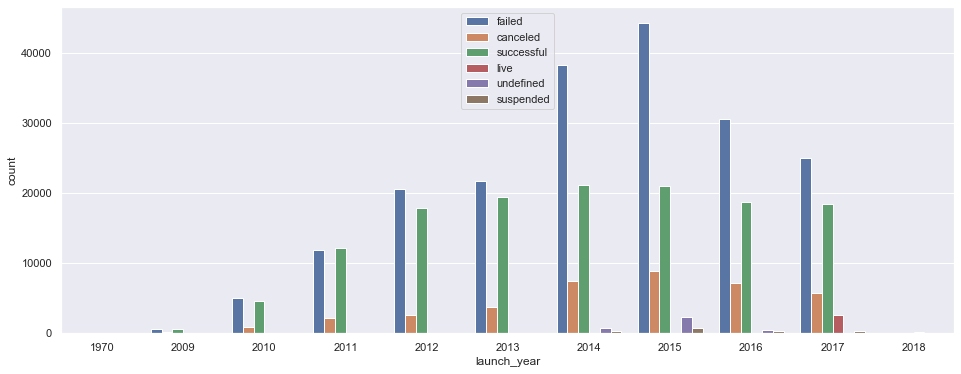

In [15]:
year = enp['launch_year'].value_counts()
plt.figure(figsize=(16,6))
sns.countplot(x="launch_year", hue='state', data=enp)
plt.legend(loc='upper center')
plt.show()

In [16]:
def percent_plot(data, title):
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

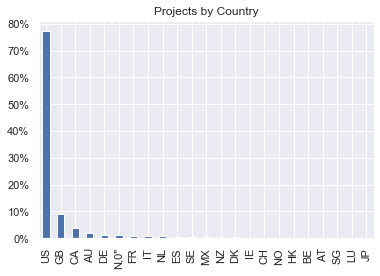

In [17]:
percent_plot((enp.country.value_counts()/enp.shape[0]*100), "Projects by Country")

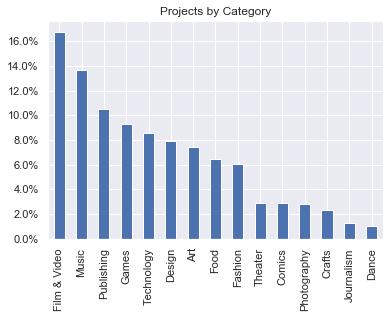

In [18]:
percent_plot((enp.main_category.value_counts()/enp.shape[0]*100),"Projects by Category")

## 5. Data Preprocessing

### 5.1 Checking and dealing with Missing Values¶

In [19]:
enp.isnull().sum().sort_values(ascending = False)

usd_pledged         3797
name                   4
deadline_year          0
launched               0
category               0
main_category          0
currency               0
deadline               0
goal                   0
pledged                0
launch_year            0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
id                     0
dtype: int64

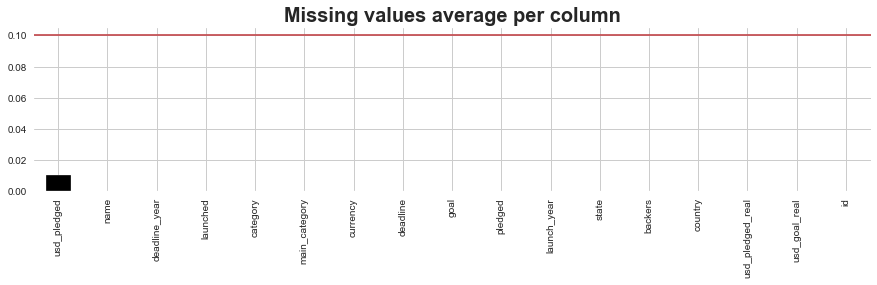

In [20]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))

enp.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.show()

In [21]:
enp['usd_pledged']=enp['usd_pledged'].fillna(enp['usd_pledged'].mean())

In [22]:
enp.isnull().sum().sort_values(ascending = False)

name                4
deadline_year       0
launched            0
category            0
main_category       0
currency            0
deadline            0
goal                0
pledged             0
launch_year         0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
id                  0
dtype: int64

### 5.2 Feature Engineering and Selection

- Drop below features:
    - id & name as there are unique identifier
    - currency as it will corroleate and tied to country
    - category and use main_category instead
    - usd_pledged and use usd_pledged_real
    - goal and use usd_goal_real
    - pledged and use usd_pledged_real
    - launched as we have created launched_year
    - deadline as we have deadline_year

In [23]:
not_needed = ['id','name','goal','currency','pledged','usd_pledged','launched','deadline','category']
enp = enp.drop(not_needed, axis=1)

In [24]:
enp.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,deadline_year
0,Publishing,failed,0,GB,0.0,1533.95,2015,2015
1,Film & Video,failed,15,US,2421.0,30000.00,2017,2017
2,Film & Video,failed,3,US,220.0,45000.00,2013,2013
3,Music,failed,1,US,1.0,5000.00,2012,2012
4,Film & Video,canceled,14,US,1283.0,19500.00,2015,2015


#### Filter and encode the target variable

In [25]:
enp=enp.drop(enp.query("state != 'failed' and state != 'successful' ").index, axis=0).reset_index(drop=True)

In [26]:
enp['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

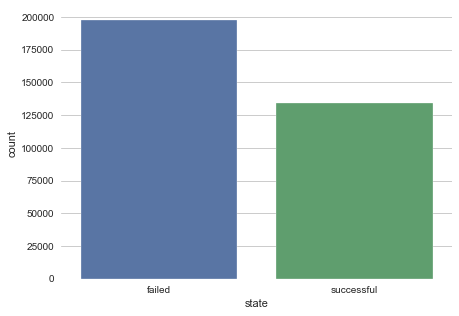

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x='state', data=enp, order = enp['state'].value_counts().index)

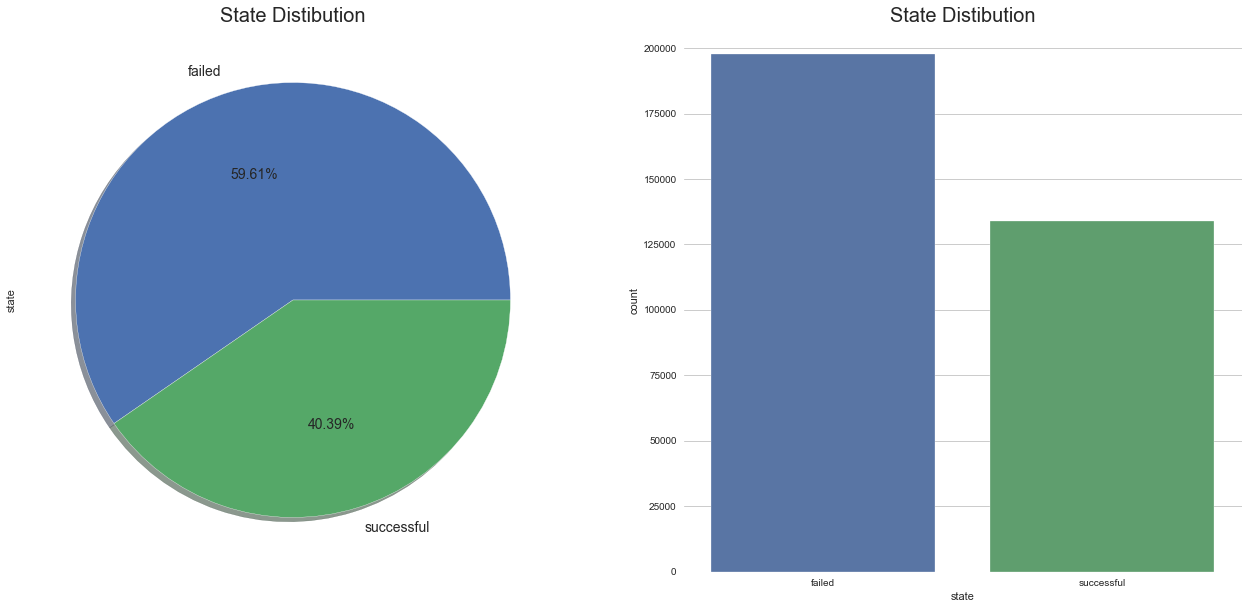

In [28]:
f,ax=plt.subplots(1,2,figsize=(22,10))
enp['state'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], shadow=True, fontsize=14)
ax[0].set_title('State Distibution', fontsize=20)

sns.countplot(x="state", data=enp, order = enp['state'].value_counts().index)
ax[1].set_title('State Distibution', fontsize=20)
plt.show()

In [29]:
enp['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

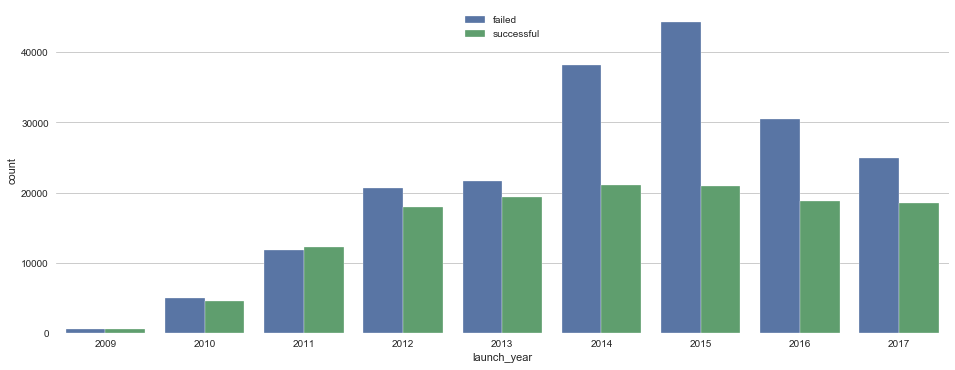

In [30]:
year = enp['launch_year'].value_counts()
plt.figure(figsize=(16,6))
sns.countplot(x="launch_year", hue='state', data=enp)
plt.legend(loc='upper center')
plt.show()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

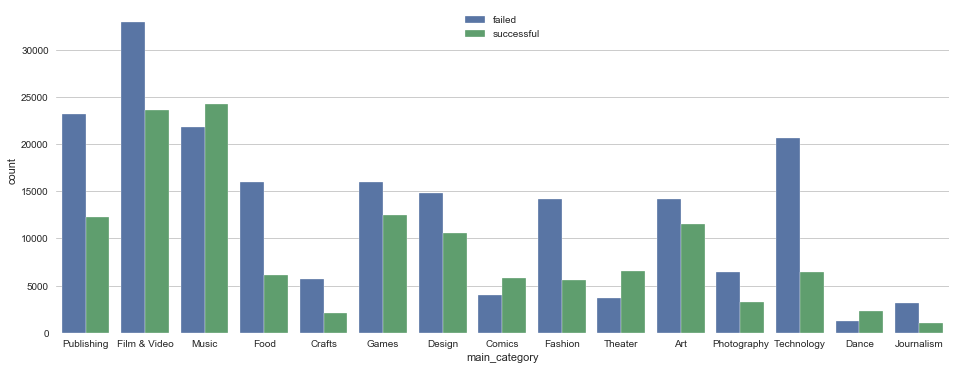

In [31]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=enp, hue= 'state')
plt.legend(loc='upper center')
plt.tight_layout

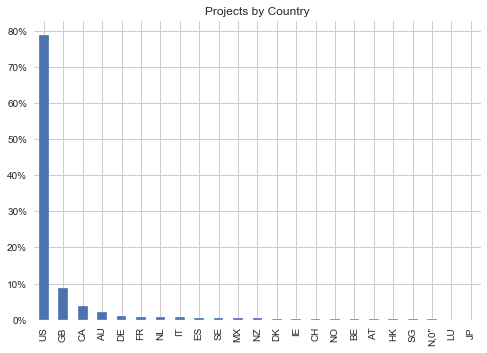

In [32]:
percent_plot((enp.country.value_counts()/enp.shape[0]*100), "Projects by Country")

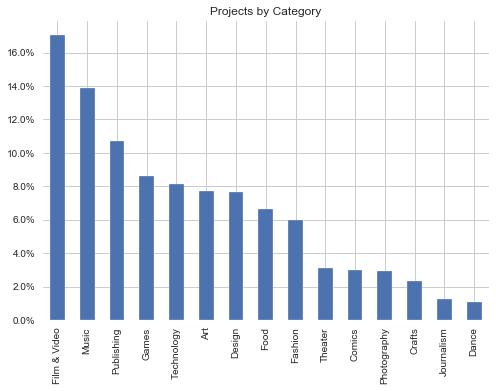

In [33]:
percent_plot((enp.main_category.value_counts()/enp.shape[0]*100),"Projects by Category")

In [34]:
enp['state']=enp['state'].map({'failed':0,'successful':1})

In [35]:
enp_new = enp.copy()

In [36]:
# create dummy variables
# dummy variables are those which have only binary values 0,1
enp_new = pd.get_dummies(enp_new, columns =['main_category','country','launch_year','deadline_year'],drop_first=True)

In [37]:
enp_new.shape

(331675, 57)

### Check the Feature Importances

In [40]:
 X = enp_new.drop('state', axis = 1)
 y = enp_new.state

In [41]:
# Splitting the dataset into the Training set and Test set
training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .3,
                                               random_state= 45)

[2.36464938e-01 4.80586645e-01 2.44460838e-01 1.03403997e-03
 3.54466640e-04 5.71577170e-04 1.92234417e-03 1.13317834e-03
 1.05814069e-03 1.63901591e-03 1.76073677e-03 2.02090073e-04
 3.63192940e-03 4.80455988e-04 8.01607628e-04 5.15173366e-03
 2.14908231e-03 4.76606220e-04 1.05345375e-04 5.95478611e-04
 1.16539065e-04 3.35666519e-04 1.24286584e-04 2.24066045e-04
 2.59046707e-04 1.01773507e-03 7.35965085e-05 1.11074130e-04
 2.97030243e-04 1.49702759e-05 1.60937424e-05 1.37352660e-04
 2.06393464e-04 3.06139799e-04 1.11923541e-04 1.91116311e-04
 1.60527465e-04 1.63175933e-04 1.39255797e-03 2.59832358e-04
 6.30700404e-04 4.04576170e-04 5.67310317e-04 5.55082714e-04
 1.21631719e-03 5.97061301e-04 7.53686632e-04 2.14244388e-04
 6.09520525e-04 4.83336645e-04 5.61248351e-04 6.07110854e-04
 1.47894502e-03 5.49792817e-04 6.28019064e-04 4.36730509e-05]


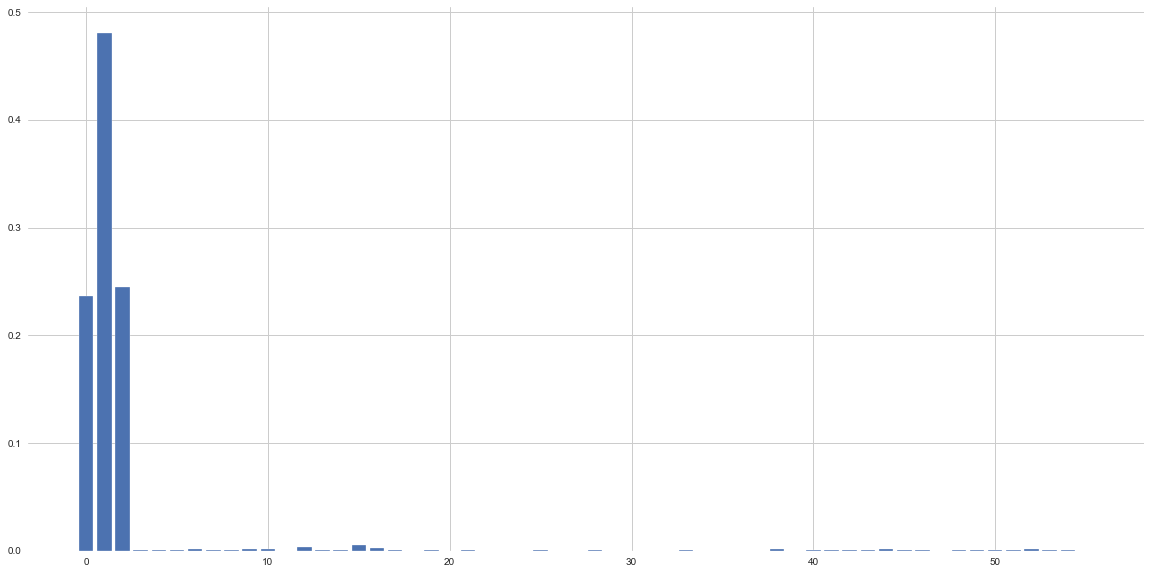

,Importance Coef,Features
1,0.480587,usd_pledged_real
2,0.244461,usd_goal_real
0,0.236465,backers
15,0.005152,main_category_Technology
12,0.003632,main_category_Music
16,0.002149,main_category_Theater
6,0.001922,main_category_Design
10,0.001761,main_category_Games
9,0.001639,main_category_Food
52,0.001479,deadline_year_2015


In [42]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = RandomForestClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

## 6. Modeling (By using only high features)

### 6.1 Machine Learning (Decision Tree)

In [43]:
enp_kik = enp_new[['usd_pledged_real','backers','usd_goal_real','state']]

In [44]:
X = enp_new[['usd_pledged_real','backers','usd_goal_real']]
y = enp_new.state

In [45]:
# Splitting the dataset into the Training set and Test set
training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .3,
                                               random_state= 45)

In [46]:
enp_new['state'].value_counts(normalize=True)

0    0.596123
1    0.403877
Name: state, dtype: float64

In [47]:
dummy_baseline = DummyClassifier(strategy="most_frequent")
dummy_baseline.fit(test_features, test_target)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [48]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.599


In [49]:
DTModel = DecisionTreeClassifier(random_state = 45,max_depth=4)

In [50]:
# Training input and its Target variables
DTModel.fit(training_features, training_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=45, splitter='best')

In [51]:
# Prediction
DT_Pred = DTModel.predict(test_features) 

In [52]:
# Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[56252,  3351],
       [ 1018, 38882]], dtype=int64)

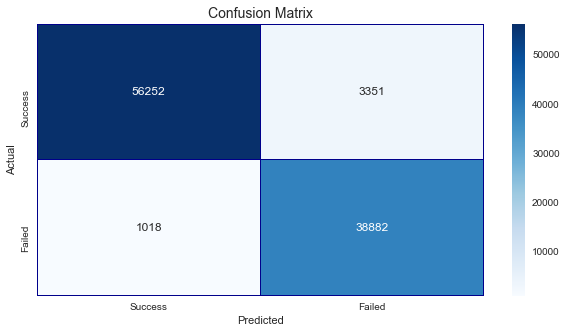

In [53]:
target = 'state'
CMTD = pd.crosstab(test_target,DT_Pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.heatmap(CMTD, 
            xticklabels=['Success', 'Failed'],
            yticklabels=['Success', 'Failed'],
            annot=True,ax=ax1,fmt="d",
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [54]:
# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)
print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))

 Decision Tree Prediction Accuracy : 95.61%


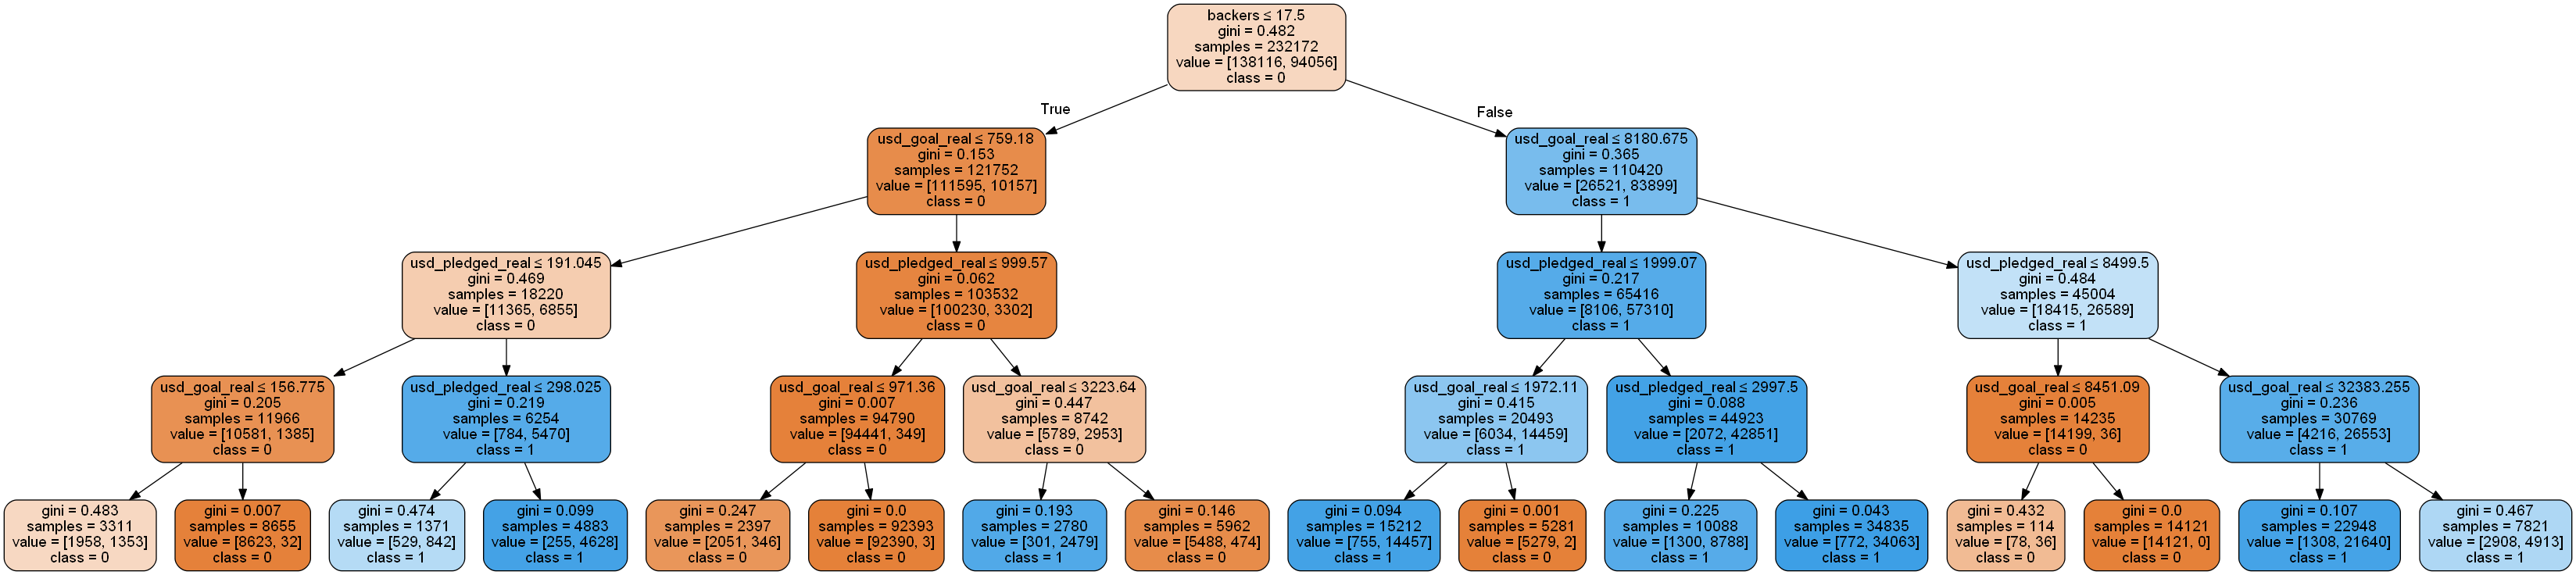

In [55]:
dot_data = StringIO()
export_graphviz(DTModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('state.png')
Image(graph.create_png())

### 6.2 Machine Learning (Random Forest)

In [56]:
# Fit Random Forest
RFModel = RandomForestClassifier(max_depth=5,n_estimators=80, oob_score= True, random_state= 42)
RFModel.fit(training_features, training_target)
RF_pred = RFModel.predict(test_features)
ACRF= accuracy_score(test_target, RF_pred )

In [57]:
print(' The fraction of correct classifications is            : {:.2f}%'.format(score * 100))
print(" Decision Tree Prediction Accuracy                     : {:.2f}%".format(ADT * 100))
print(" Random Forest Prediction Accuracy                     : {:.2f}%".format(ACRF * 100))

 The fraction of correct classifications is            : 59.90%
 Decision Tree Prediction Accuracy                     : 95.61%
 Random Forest Prediction Accuracy                     : 97.09%


### 6.3 Machine Learning (Applying k-Fold Cross Validation for Random Forest)

In [58]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
RF_Accuracies   = cross_val_score(estimator = RFModel, X = training_features, y = training_target, cv = 10)

In [59]:
print(" Random Forest Accuracy with Cross Validation:   %0.2f (+/- %0.2f)"  % (RF_Accuracies.mean(), RF_Accuracies.std()     * 2))

 Random Forest Accuracy with Cross Validation:   0.97 (+/- 0.00)


### Feature Scaling

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sc = StandardScaler()

In [61]:
pipe = Pipeline([('scaler', sc)])

In [62]:
training_features = pipe.fit_transform(training_features)
test_features = pipe.transform(test_features)
training_features

array([[-0.09187655, -0.11751965, -0.01115114],
       [-0.10057489, -0.12621529, -0.03545001],
       [-0.09414382, -0.0925197 , -0.037166  ],
       ...,
       [ 0.48778841,  0.28574044, -0.03149669],
       [ 0.01591505,  0.03574092, -0.02885006],
       [-0.10047434, -0.12512833, -0.03589001]])

### 6.4 Deep Learning (ANN)

In [63]:
# Initialising the ANN
classifier = tf.keras.Sequential()
# Adding the input layer and the first hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='uniform',input_dim=3))
# Adding the second hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer ='uniform'))
# Adding the Third hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='uniform'))
# Adding the Forth hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='uniform'))
# Adding the Fivth hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='uniform'))
# Adding the output layer
classifier.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='uniform'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###  ANN Prediction

In [64]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=2, verbose=1, mode='auto', restore_best_weights=True)

In [65]:
# Fitting the ANN to the Training set
classifier.fit(training_features, training_target, batch_size = 10, callbacks=[monitor], verbose=2, epochs=10)

# evaluate the model
scores = classifier.evaluate(training_features, training_target)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/10
23218/23218 - 17s - loss: 0.2323 - accuracy: 0.9043
Epoch 2/10
23218/23218 - 16s - loss: 0.0843 - accuracy: 0.9678
Epoch 3/10
23218/23218 - 16s - loss: 0.0811 - accuracy: 0.9694
Epoch 4/10
23218/23218 - 16s - loss: 0.0770 - accuracy: 0.9707
Epoch 5/10
23218/23218 - 16s - loss: 0.0726 - accuracy: 0.9729
Epoch 6/10
23218/23218 - 16s - loss: 0.0719 - accuracy: 0.9732
Epoch 7/10
23218/23218 - 16s - loss: 0.0696 - accuracy: 0.9737
Epoch 8/10
23218/23218 - 16s - loss: 0.0653 - accuracy: 0.9757
Epoch 9/10
23218/23218 - 16s - loss: 0.0648 - accuracy: 0.9758
Epoch 10/10
23218/23218 - 16s - loss: 0.0613 - accuracy: 0.9770
7256/7256 [==============================] - 6s 743us/step - loss: 0.0349 - accuracy: 0.9909

accuracy: 99.09%


In [66]:
%%time
# Predicting the Test set results
ANN_pred = classifier.predict(test_features)
ANN_pred = (ANN_pred > 0.5)
# Accuracy Score
ACANN= accuracy_score(test_target, ANN_pred )
print(ACANN)

0.9910957458569088
Wall time: 1.35 s


In [67]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
__________________________________________________________

### Save Model

In [68]:
#Save Model with ANN
classifier.save(os.path.join(os.getcwd(),"enpowered_model.h5"))

In [69]:
cols = [x for x in enp_kik.columns if x not in ('enpowered', 'name')]
cols

print("{")
for i,name in enumerate(cols):
    print(f'"{name}":{{"min":{enp_kik[name].min()},"max":{enp_kik[name].max()}}}{"," if i<(len(cols)-1) else ""}')
print("}")


{
"usd_pledged_real":{"min":0.0,"max":20338986.27},
"backers":{"min":0,"max":219382},
"usd_goal_real":{"min":0.01,"max":166361390.71},
"state":{"min":0,"max":1}
}
